In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
import pickle

# Importando variáveis de treino e teste desenvolvidos na etapa de preparação dos dados

In [2]:
def open_train_test():
  with open('train_test.pkl','rb') as f:
    return pickle.load(f)

In [3]:
X_train, X_test, y_train, y_test = open_train_test()

# GridSearchCV
O GridSearchCV é um módulo do Scikit Learn e é amplamente usado para automatizar grande parte do processo de tuning. O objetivo primário do GridSearchCV é a criação de combinações de parâmetros para posteriormente avaliá-las.

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

Vamos visualizar os resultados dos testes utitlizando 4 métricas diferentes  
- **Precision**: é usada para medir o desempenho do modelo ao medir a contageem de positivos verdadeiros da maneira correta de todas as previsões positivas feitas.
- **Recall**: é usada para medir o desempenho do modeleo ao medir a contagem de positivos verdadeiros de maneira correta de todos os valores posititvos reais.
- **Precision**: é usada para medir o desempenho do modelo ao medir a razão da soma de positivos verdadeiros e verdadeiros negativos de todas as previsões
- **F1-score**: é a média harmônica de precision e recall e é usada como uma métrica nos cenários em que a escolha de precisão ou pontuação de recall pode resultar em comprometimento em termos de modeleo dando altos falsos positivos e falsos negativos, respectivamente.

In [5]:
metrics = {'accuracy' :make_scorer(accuracy_score),
           'recall'   :make_scorer(recall_score),
           'precision':make_scorer(precision_score),
           'f1'       :make_scorer(fbeta_score, beta = 1)}

## Cross Validation
O Cross validation cria várias combinações diferentes para treino e teste, o que torna o resultado das métricas mais precisa e condinzente com o desempenho real do algoritmo.  

Para definir o número de CV no nosso algoritmto, vamos utilizar o StratifiedShuffleSplit, que fornece índices de treinamento/teste para dividir dados em conjuntos de treinamento/teste.

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

cv_sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2)

# KNN - K-Nearest Neighbors

## Teste 1
Na primeira etapa de teste do KNN, vamos utilizar o conjunto dos parâmetros possíveis para esse modelo. A partir dos resultados obtidos, vamos realizar o funilamento de parâmetros para extrair a melhor combinação possível

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [8]:
knn_parameters = {
      'n_neighbors': (5, 7, 9, 11, 13, 15)
    , 'weights': ['uniform', 'distance'] 
    , 'algorithm': ['auto','ball_tree','kd_tree','brute']
    , 'p': (1,2)
    , 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis']
}

In [9]:
def knn_count(df, count = False, **kargs):
  alg, met, n_neig, p_dict, weig = dict(), dict(), dict(), dict(), dict()

  for param in kargs['algorithm']:
    alg[param] = 0
  
  for param in kargs['metric']:
    met[param] = 0
  
  for param in kargs['n_neighbors']:
    n_neig[param] = 0
  
  for param in kargs['p']:
    p_dict[param] = 0
  
  for param in kargs['weights']:
    weig[param] = 0

  knn_params_count = {
        'algorithm': alg
      , 'metric': met
      , 'n_neighbors': n_neig
      , 'p': p_dict
      , 'weights': weig
  }

  if not count:
    count = df.shape[0]

  for i in range(count):
    algorithm   = df['params'][i]['algorithm']
    metric      = df['params'][i]['metric']
    n_neighbors = df['params'][i]['n_neighbors']
    p           = df['params'][i]['p']
    weights     = df['params'][i]['weights']

    knn_params_count['algorithm'][algorithm] += 1
    knn_params_count['metric'][metric] += 1
    knn_params_count['n_neighbors'][n_neighbors] += 1
    knn_params_count['p'][p] += 1
    knn_params_count['weights'][weights] += 1

  return knn_params_count

In [10]:
test_1_knn = GridSearchCV(estimator = knn,
                      param_grid = knn_parameters,
                      cv = cv_sss,
                      scoring = metrics,
                      refit=False)

test_1_knn.fit(X_train, y_train)

A saída de streaming foi truncada nas últimas 5000 linhas.
    **kwds,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py", line 1709, in pairwise_distances_chunked
    params = _precompute_metric_params(X, Y, metric=metric, **kwds)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py", line 1552, in _precompute_metric_params
    "The 'VI' parameter is required for the mahalanobis metric "
ValueError: The 'VI' parameter is required for the mahalanobis metric when Y is passed.

  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return cache[method]
KeyError: 'predict'

During handling of the above exception, another exception occurred:

Trac

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.2,
            train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski', 'wminkowski', 'seuclidean',
                                    'mahalanobis'],
                         'n_neighbors': (5, 7, 9, 11, 13, 15), 'p': (1, 2),
                         'weights': ['uniform', 'distance']},
             refit=False,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(fbeta_score, beta=1),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [11]:
df_knn_1 = pd.DataFrame(test_1_knn.cv_results_)[['params', 'rank_test_f1', 'rank_test_accuracy', 'rank_test_recall', 'rank_test_precision','mean_test_accuracy', 'mean_test_recall','mean_test_precision','mean_test_f1']]
df_knn_1.sort_values(by=['rank_test_f1', 'rank_test_accuracy', 'rank_test_recall', 'rank_test_precision'], inplace=True)

In [12]:
print(f"Verificando os 5 melhores resultados das {df_knn_1.shape[0]} combinações diferentes ordenados por: rank_test_f1, rank_test_accuracy, rank_test_recall e rank_test_precision")

Verificando os 5 melhores resultados das 672 combinações diferentes ordenados por: rank_test_f1, rank_test_accuracy, rank_test_recall e rank_test_precision


In [13]:
df_knn_1.head()

,params,rank_test_f1,rank_test_accuracy,rank_test_recall,rank_test_precision,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
25,"{'algorithm': 'auto', 'metric': 'manhattan', '...",1,1,13,1,0.830907,0.702632,0.944551,0.805516
27,"{'algorithm': 'auto', 'metric': 'manhattan', '...",1,1,13,1,0.830907,0.702632,0.944551,0.805516
73,"{'algorithm': 'auto', 'metric': 'minkowski', '...",1,1,13,1,0.830907,0.702632,0.944551,0.805516
193,"{'algorithm': 'ball_tree', 'metric': 'manhatta...",1,1,13,1,0.830907,0.702632,0.944551,0.805516
195,"{'algorithm': 'ball_tree', 'metric': 'manhatta...",1,1,13,1,0.830907,0.702632,0.944551,0.805516


### Realizando a contagem dos parâmetros que foram utitlizados nas 20 melhores classificações

In [14]:
knn_count(df = df_knn_1, count = 20
          , n_neighbors = knn_parameters['n_neighbors']
          , weights = knn_parameters['weights']
          , algorithm = knn_parameters['algorithm']
          , p = knn_parameters['p']
          , metric = knn_parameters['metric'])

{'algorithm': {'auto': 20, 'ball_tree': 0, 'brute': 0, 'kd_tree': 0},
 'metric': {'chebyshev': 0,
  'euclidean': 20,
  'mahalanobis': 0,
  'manhattan': 0,
  'minkowski': 0,
  'seuclidean': 0,
  'wminkowski': 0},
 'n_neighbors': {5: 4, 7: 4, 9: 4, 11: 4, 13: 4, 15: 0},
 'p': {1: 10, 2: 10},
 'weights': {'distance': 10, 'uniform': 10}}

## Teste 2
Vamos utitlizar os parâmetros mais recorrentes nas melhores classificações e realizar uma segunda rodada de testes para determinar a melhor combinação de parâmetros

In [31]:
knn_parameters = {
      'n_neighbors': (5, 7)
    , 'weights': ['uniform', 'distance'] 
    , 'algorithm': ['auto']
    , 'p': (1,2)
    , 'metric': ['euclidean']
}

In [32]:
test_2_knn = GridSearchCV(estimator = knn,
                      param_grid = knn_parameters,
                      cv = cv_sss,
                      scoring = metrics,
                      refit=False)

test_2_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.2,
            train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'metric': ['euclidean'],
                         'n_neighbors': (5, 7), 'p': (1, 2),
                         'weights': ['uniform', 'distance']},
             refit=False,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(fbeta_score, beta=1),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [33]:
df_knn_2 = pd.DataFrame(test_2_knn.cv_results_)[['params', 'rank_test_f1', 'rank_test_accuracy', 'rank_test_recall', 'rank_test_precision','mean_test_accuracy', 'mean_test_recall','mean_test_precision','mean_test_f1']]
df_knn_2.sort_values(by=['rank_test_f1', 'rank_test_accuracy', 'rank_test_recall', 'rank_test_precision'], inplace=True)

In [34]:
print(f"Verificando os 5 melhores resultados das {df_knn_2.shape[0]} combinações diferentes ordenados por: rank_test_f1, rank_test_accuracy, rank_test_recall e rank_test_precision")

Verificando os 5 melhores resultados das 8 combinações diferentes ordenados por: rank_test_f1, rank_test_accuracy, rank_test_recall e rank_test_precision


In [35]:
df_knn_2.head()

,params,rank_test_f1,rank_test_accuracy,rank_test_recall,rank_test_precision,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
1,"{'algorithm': 'auto', 'metric': 'euclidean', '...",1,1,1,1,0.824344,0.710526,0.919522,0.801321
3,"{'algorithm': 'auto', 'metric': 'euclidean', '...",1,1,1,1,0.824344,0.710526,0.919522,0.801321
5,"{'algorithm': 'auto', 'metric': 'euclidean', '...",3,3,5,3,0.816945,0.699522,0.913845,0.792096
7,"{'algorithm': 'auto', 'metric': 'euclidean', '...",3,3,5,3,0.816945,0.699522,0.913845,0.792096
0,"{'algorithm': 'auto', 'metric': 'euclidean', '...",5,5,3,5,0.807160,0.702153,0.888126,0.784044


In [36]:
knn_count(df = df_knn_2
          , n_neighbors = knn_parameters['n_neighbors']
          , weights = knn_parameters['weights']
          , algorithm = knn_parameters['algorithm']
          , p = knn_parameters['p']
          , metric = knn_parameters['metric'])

{'algorithm': {'auto': 8},
 'metric': {'euclidean': 8},
 'n_neighbors': {5: 4, 7: 4},
 'p': {1: 4, 2: 4},
 'weights': {'distance': 4, 'uniform': 4}}

In [37]:
knn_best_param = df_knn_2['params'][0]

In [42]:
algorithm   = knn_best_param['algorithm']
metric      = knn_best_param['metric']
n_neighbors = knn_best_param['n_neighbors']
p           = knn_best_param['p']
weights     = knn_best_param['weights']
knn_best_param

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 5,
 'p': 1,
 'weights': 'uniform'}

# Classificação com os melhores parâmetros

In [49]:
KNN = KNeighborsClassifier(algorithm=algorithm, metric=metric, n_neighbors=n_neighbors, p=p, weights=weights)
KNN.fit(X_train, y_train);
y_pred = KNN.predict(X_test)

In [58]:
print('1: Masculino\n2: Feminino\n',classification_report(y_test, y_pred))

1: Masculino
2: Feminino
               precision    recall  f1-score   support

           1       0.92      0.74      0.82       704
           2       0.78      0.93      0.85       692

    accuracy                           0.84      1396
   macro avg       0.85      0.84      0.84      1396
weighted avg       0.85      0.84      0.84      1396



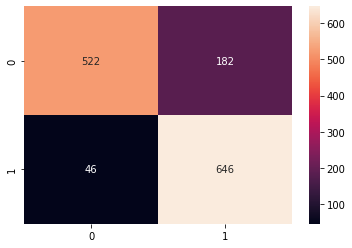

In [51]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

# Exportando modelo treinado

In [60]:
path = '/content/drive/MyDrive/Mineração de Dados/IF998 - Missões SMD/Projeto/'
with open(path+'KNN_model.pkl', 'wb') as f:
    pickle.dump([KNN], f) 